In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [4]:
df = pd.read_csv('finalData.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)

In [10]:
df.drop_duplicates(inplace=True)
df.head()

,prop_type,price,beds,baths,source,city,sqft
0,townhome,101,2,3,mls,Staten Island,121.0
1,townhome,850,1,1,unit_rental,New York,179.0
2,single_family,900,1,2,mls,Corona,900.0
3,condo,900,4,1,unit_rental,New York,128.0
4,condo,925,4,2,unit_rental,New York,104.0


In [11]:
df.shape

(137, 7)

In [31]:
numeric_features.append('price')

In [32]:
numeric_features

['beds', 'baths', 'sqft', 'price', 'price']

In [50]:
import seaborn as sns

In [60]:
df['temp'] = df['beds']+df['baths']+df['sqft']

<Axes: >

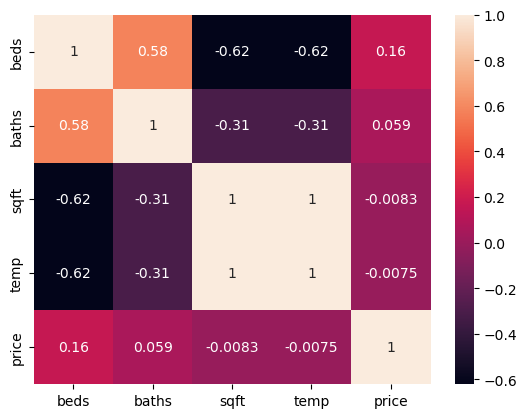

In [61]:

sns.heatmap(df[['beds', 'baths','sqft','temp','price']].corr(),annot=True)

In [26]:
df[numeric_features].corr()

,beds,baths,sqft
beds,1.000000,0.577916,-0.621443
baths,0.577916,1.000000,-0.309038
sqft,-0.621443,-0.309038,1.000000


In [12]:
df

,prop_type,price,beds,baths,source,city,sqft
0,townhome,101,2,3,mls,Staten Island,121.000000
1,townhome,850,1,1,unit_rental,New York,179.000000
2,single_family,900,1,2,mls,Corona,900.000000
3,condo,900,4,1,unit_rental,New York,128.000000
4,condo,925,4,2,unit_rental,New York,104.000000
...,...,...,...,...,...,...,...
163,condo,1425,4,2,unit_rental,New York,192.777581
164,condo,1425,3,1,unit_rental,New York,222.749760
167,condo,1425,4,3,unit_rental,New York,130.062141
168,condo,1430,5,3,unit_rental,New York,164.940584


In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [47]:
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define transformers for numeric and categorical columns
numeric_features = ['beds', 'baths','sqft']
categorical_features = ['prop_type', 'source','city']

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

model = RandomForestRegressor(n_estimators=100, random_state=42)

# Create a pipeline with the preprocessor and the linear regression model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('RF regressor', model)
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict scores on the test data
y_pred = pipeline.predict(X_test)

print('R2 score: ',r2_score(y_pred, y_test))

accuracy = pipeline.score(X_test,y_pred)
print( 'RF Regression Accuracy: ', accuracy*100,'%')


R2 score:  -0.4230230805748785
RF Regression Accuracy:  100.0 %


In [42]:
X_test

,prop_type,beds,baths,source,city,sqft
121,single_family,1,1,mls,Saint Albans,1066.937985
119,condo,3,1,unit_rental,New York,169.370229
12,condo,5,2,unit_rental,New York,145.000000
26,condo,4,2,unit_rental,New York,112.000000
151,condo,3,1,unit_rental,New York,212.073854
68,condo,5,2,unit_rental,New York,65.382249
66,condo,4,1,unit_rental,New York,74.002616
141,apartment,2,1,community,New York,264.662154
164,condo,3,1,unit_rental,New York,222.749760
91,duplex_triplex,1,1,unit_rental,Brooklyn,878.672319


In [43]:
y_test

121    1300
119    1300
12     1075
26     1275
151    1400
68     1050
66     1000
141    1350
164    1425
91     1200
90     1200
46     1395
71     1075
69     1060
31     1300
43     1375
27     1275
19     1200
163    1425
57      900
153    1400
4       925
129    1325
37     1350
96     1210
113    1275
16     1100
18     1150
Name: price, dtype: int64

In [19]:
y_pred

array([1016.61666667, 1292.25      , 1222.65      , 1335.5       ,
       1369.5       , 1056.55      , 1068.75      , 1211.63      ,
       1359.75      , 1259.1       , 1286.25      , 1292.38964286,
       1140.        , 1184.19166667,  502.94      ,  648.54      ,
       1076.25      , 1271.6875    , 1393.        ,  971.7       ,
       1344.75      , 1281.05      , 1328.75      , 1158.75      ,
       1141.92916667, 1339.75      , 1353.        , 1332.5       ])

In [20]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 59373.23


In [35]:
from sklearn.metrics import r2_score
r2_score(y_pred, y_test)

-0.36392113325021835

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define transformers for numeric and categorical columns
numeric_features = ['beds', 'baths', 'sqft']
categorical_features = ['prop_type', 'source', 'city']

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Initialize the random forest regressor
model = RandomForestRegressor(random_state=42)

# Create a pipeline with the preprocessor and the random forest regressor
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('RF regressor', model)
])

# Define hyperparameters to tune
param_grid = {
    'RF regressor__n_estimators': [50, 100, 200],
    'RF regressor__max_depth': [None, 10, 20, 30],
    'RF regressor__min_samples_split': [2, 5, 10],
    'RF regressor__min_samples_leaf': [1, 2, 4]
}

# Initialize grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')

# Fit the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print('Best Parameters:', best_params)
print('Best R2 Score:', best_score)

# Predict scores on the test data using the best estimator from grid search
y_pred = grid_search.best_estimator_.predict(X_test)

# Evaluate the model using R2 score
r2 = r2_score(y_test, y_pred)
print('R2 score on test data:', r2)

# Print the feature importances
feature_importances = grid_search.best_estimator_.named_steps['RF regressor'].feature_importances_
print('Feature Importances:', feature_importances)

Best Parameters: {'RF regressor__max_depth': None, 'RF regressor__min_samples_leaf': 1, 'RF regressor__min_samples_split': 10, 'RF regressor__n_estimators': 50}
Best R2 Score: 0.20650958647862253
R2 score on test data: -1.8133102006786417
Feature Importances: [8.00486869e-02 5.14807976e-02 3.44630039e-01 5.22335529e-03
 1.79855146e-02 6.11610097e-04 2.24345894e-02 7.14999478e-02
 3.05757398e-03 8.69997455e-03 5.21328901e-02 9.43628891e-03
 1.35355554e-02 8.35804239e-04 7.21475782e-03 5.60479553e-03
 2.41690021e-02 3.66596766e-03 2.14189745e-04 2.92028124e-04
 2.77226631e-01]


### A bad R2-score was observed for the RF regressor despite the hyper parameter tuning, meaning either DL models could be implemented or the data is bad